In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression 



In [121]:
df=pd.read_csv("salary.csv")
target=df.pop('salary')
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [122]:
df.occupation.value_counts()

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

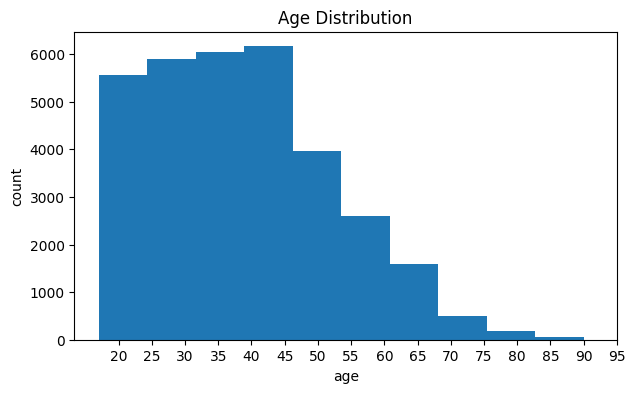

In [123]:
#Check Age Distribution
plt.hist(df['age'])
plt.xlabel('age')
plt.ylabel('count')
plt.rcParams['figure.figsize'] = (7,4)
plt.xticks(np.arange(20,100,5))
plt.title('Age Distribution')
plt.show()

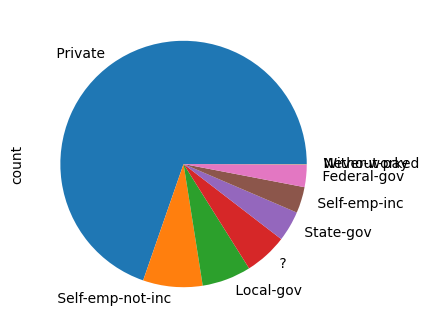

In [105]:
#Check Working Class
df['workclass'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize']= (8,10)
plt.show()

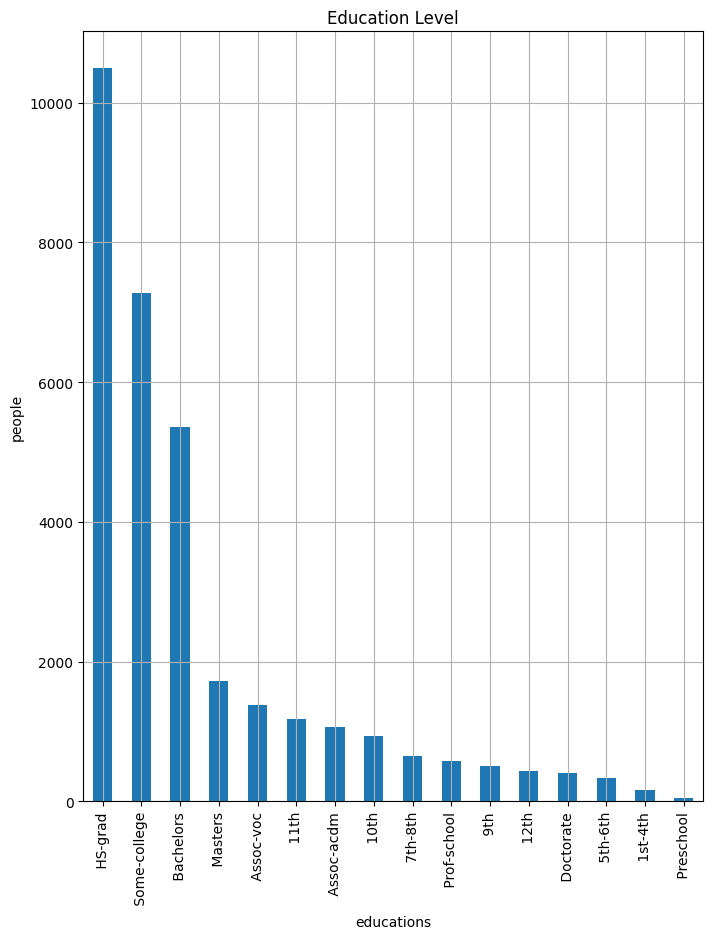

In [106]:
# Check education
df['education'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize']=(7,5)
plt.xlabel('educations')
plt.ylabel('people')
plt.title('Education Level')
plt.grid()
plt.show()

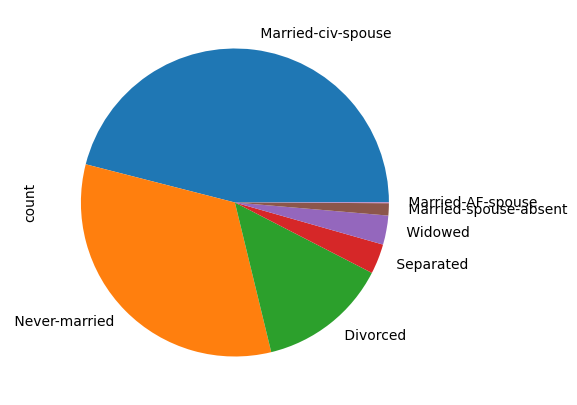

In [107]:
# Checking marital Status
df['marital-status'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize']=(7,7)
#plt.rcParams['fond.size']=12
plt.show()

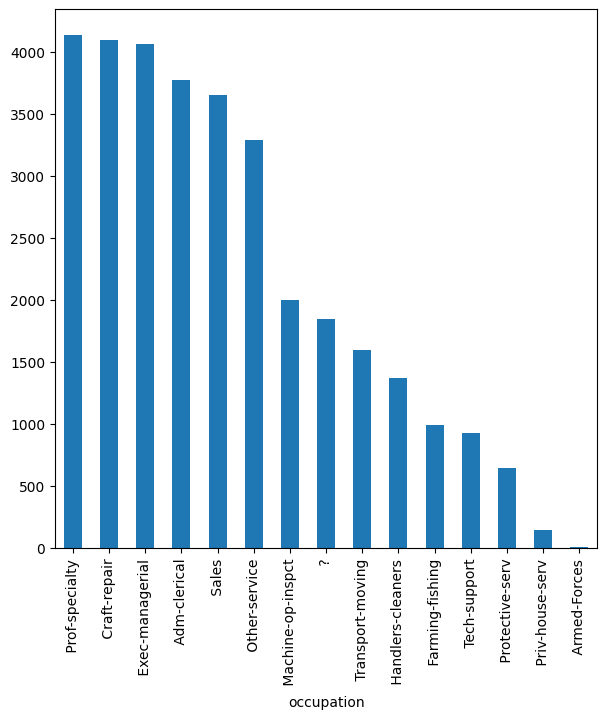

In [108]:
#checking Occupation

df['occupation'].value_counts().plot(kind='bar')
plt.show()

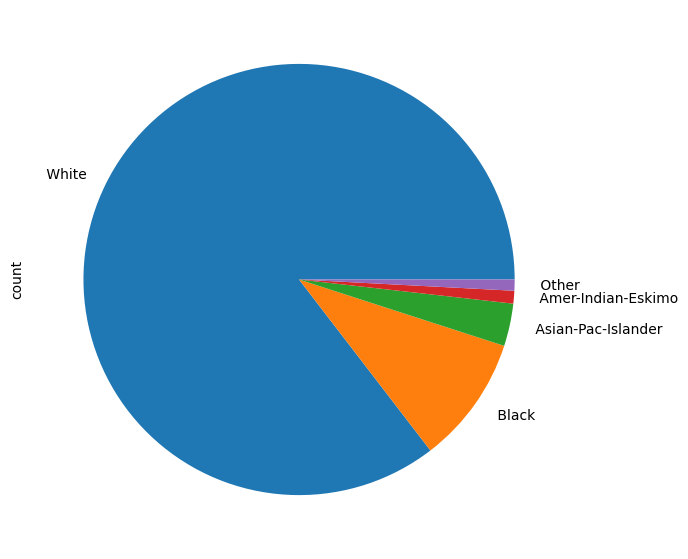

In [109]:
#Check ehiniciy
df['race'].value_counts().plot(kind='pie')
plt.show()


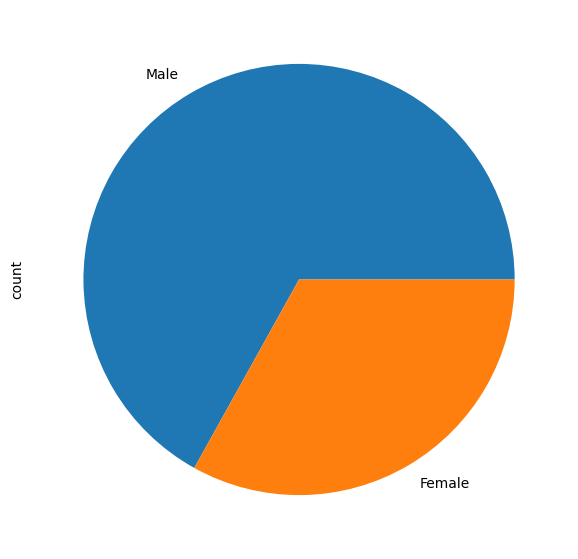

In [86]:
#Checking Gender
df['sex'].value_counts().plot(kind='pie')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

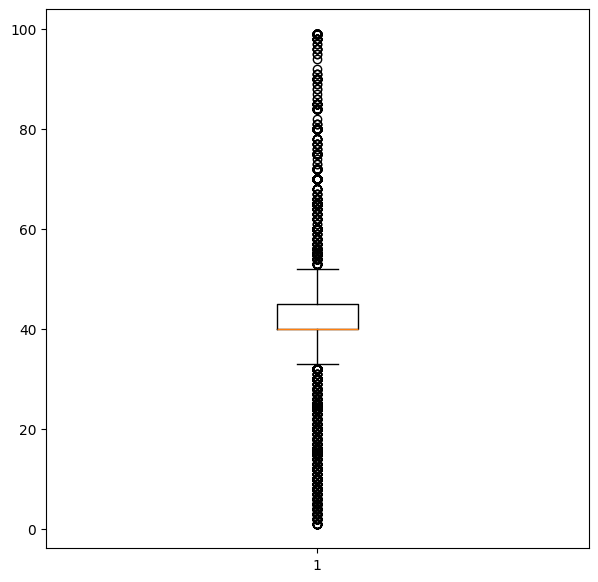

In [110]:
#checking Working Hours
plt.boxplot(df['hours-per-week'])
plt.show

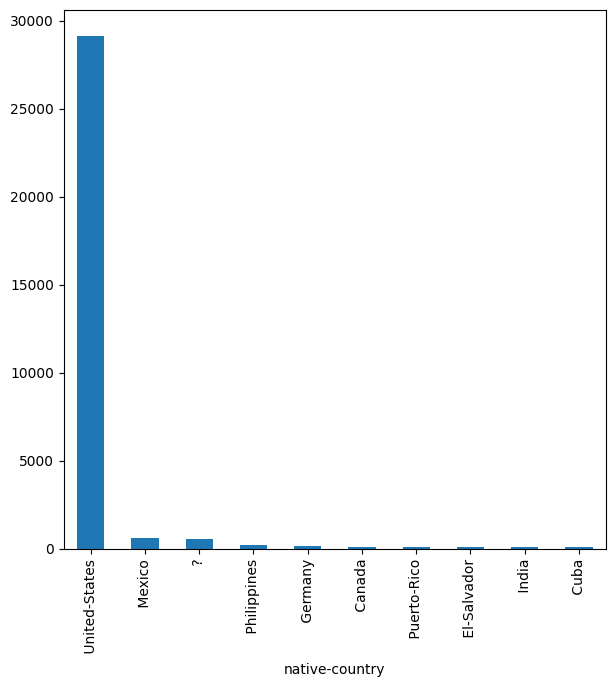

In [111]:
#checking Country of origin
df["native-country"].value_counts().head(10).plot(kind='bar')
plt.rcParams['figure.figsize']=(7,4)
plt.show()

In [124]:
sorted(df.columns)

['age',
 'capital-gain',
 'capital-loss',
 'education',
 'education-num',
 'fnlwgt',
 'hours-per-week',
 'marital-status',
 'native-country',
 'occupation',
 'race',
 'relationship',
 'sex',
 'workclass']

In [125]:
#Converting Textual colums into numeric
char_cols=df.dtypes.pipe(lambda x: x[x== 'object']).index
label_mapping={}
for c in char_cols:
    df[c],label_mapping[c]=pd.factorize(df[c])

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1


In [126]:
#removing the columns with  lesser significance ['capital-gain','capital-loss]

df=df.drop(columns=['capital-gain','capital-loss'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,0,77516,0,13,0,0,0,0,0,40,0
1,50,1,83311,0,13,1,1,1,0,0,13,0
2,38,2,215646,1,9,2,2,0,0,0,40,0
3,53,2,234721,2,7,1,2,1,1,0,40,0
4,28,2,338409,0,13,1,3,2,1,1,40,1


In [127]:
#Normalize the data using Standerd scaler

scaler=StandardScaler()
df=scaler.fit_transform(df.values)

In [129]:
#Split the data

x_train, x_test, y_train, y_test=train_test_split(df,target)

clf=LogisticRegression().fit(x_train,y_train)
y_pred=clf.predict(x_test)

print('Training Complete')



Training Complete


In [130]:
#Generate Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.88      6171
        >50K       0.66      0.39      0.49      1970

    accuracy                           0.80      8141
   macro avg       0.74      0.66      0.69      8141
weighted avg       0.79      0.80      0.79      8141

